# K Means ++ Algorithm

---
# Introduction

Given a dataset with objects 𝑋1,𝑋2,…,𝑋𝑁 ∈ ℝ𝑑 and an integer 1≤𝑘≤𝑁, the k-means algorithm tries to solve the problem:


<img src = 'Figure1.jpg' >


where 𝑆={𝑆1,𝑆2,…,𝑆𝑘} contains sets of data objects that represent clusters. 

Recall that this problem is a NP-hard problem. However, a heuristic known as Lloyd’s algorithm typically works well in practice. In addition, using a better initialization scheme called k-means++ algorithm tends to improve the quality of the k-means algorithm.

In this project, we will go through the following steps:
- Create the class object KMeans for solving the k-means objective. We DO NOT use any off-the-shelf implementations, such as the sklean clustering module. 
- Revise our implementation to use k-means++ initialization.
- Run our implementation of k-means (++) algorithm on MNIST dataset with different values of 𝑘 (2,5,10,30) cluster centers and visualize the centers – each coordinate is a gray-scale pixel.


In [1]:
import numpy as np
import math

---
# Implementation

In [2]:
class KMeans:
    
    def __init__(self, 
                 k,
                 X):
        self.k = k
        self.X = X # data objects
        self.N, self.d = self.X.shape
        
        
        
    def initialization(self, random_seed = 123):
        np.random.seed(seed = random_seed)
        self.centers = np.zeros((self.k, self.d))
        """
        We initialize our first k centers as in self.centers
        """
        # Take k random index
        center_index = np.random.choice( list(range(0,self.N)), size=self.k, replace=False)
        
        # Create the k random centers
        for i in range(0,self.k):
            self.centers[i] = self.X[center_index[i]]
        
        return self.centers
        
        
        
    def better_initialization(self, random_seed = 123):
        np.random.seed(seed = random_seed)
        self.centers = np.zeros((self.k, self.d))
        """
        We implement the k-means++ initialization here
        """
        # Select the first data object randomnly
        Centers = []
        first_center = self.X[ np.random.choice( list(range(0,self.N)) ) ]
        Centers.append(first_center)
        
        # Repeat the following until k centers have been found
        Probabilities = [math.inf]*self.N
        for alpha in range(1,self.k):
            # For each data object, calculate the distance between X and the nearest data object
            Distance = []
            the_center = Centers[-1]
            
            for i in range(0,self.N):
                dist = (np.linalg.norm(self.X[i] - the_center))**2
                Distance.append(dist)
            
            for j in range(0,self.N):
                Probabilities[j] = min(Probabilities[j],Distance[j])
            
            Probabilities_2 = Probabilities/sum(Probabilities)
            
            # Select one center object with probability D**2
            new_center = self.X[ np.random.choice( list(range(0,self.N)), p=Probabilities_2 ) ]
            Centers.append(new_center)
        
        # Return the centers matrix
        for a in range(0,self.k):
            self.centers[a] = Centers[a]
        
        return self.centers
                
    
    
    def cluster_assign_and_update(self):
        """
        We assign our data objects to clusters and update the k centers self.centers
        """
        # Assign each data objects to the closest cluster
        k_clusters = []
        for k in range(0,self.k):
            k_clusters.append([])
            
        for i in range(0,self.N):
            L = []
            for c in range(0,self.k):
                dist = (np.linalg.norm(self.X[i] - self.centers[c]))**2
                L.append(dist)
            L = np.array(L)
            (k_clusters[np.argmin(L)]).append(self.X[i])
        
        # Update the k centers
        for k in range(0,self.k):
            self.centers[k] = np.mean( np.array(k_clusters[k]), axis=0 )
        
        return self.centers
    
    
    
    def iteration(self, tol, max_iters=1000):
        """
        We perform kmeans iteration until convergence (we use tol and max_iters as paramters to control our convergence)
        """
        self.cluster_assign_and_update()
        c1 = self.centers
        
        for i in range(0,max_iters):
            self.cluster_assign_and_update()
            c2 = self.centers
            if np.linalg.norm(c2 - c1) <= tol:
                return self.centers
                break
            else:
                c1 = self.centers
        
        return self.centers

---
# Execute kmeans on MNIST img_arr with k = 2,5,10,30

The MNIST database contains 60000 human handwritten digit images with resolution 28×28=784.

The MNIST dataset is loaded into two numpy arrays: img_arr, which is the gray scale raw image and has dimension (60000, 784), and img_lbl_arr, which is the label (digit) of the images and has dimension (60000,).

In [3]:
npz_file = np.load('mnist_arr.npz')
img_arr = npz_file['images']

### k = 2

In [4]:
k = 2
kmeans_obj = KMeans(k,img_arr)
kmeans_obj.better_initialization()
kmeans_obj.cluster_assign_and_update()
kmeans_obj.iteration(tol=0.1)
centers_2 = kmeans_obj.centers
centers_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### k = 5

In [5]:
k = 5
kmeans_obj = KMeans(k,img_arr)
kmeans_obj.better_initialization()
kmeans_obj.cluster_assign_and_update()
kmeans_obj.iteration(tol=0.1)
centers_5 = kmeans_obj.centers
centers_5

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### k = 10

In [6]:
k = 10
kmeans_obj = KMeans(k,img_arr)
kmeans_obj.better_initialization()
kmeans_obj.cluster_assign_and_update()
kmeans_obj.iteration(tol=0.1)
centers_10 = kmeans_obj.centers
centers_10

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### k = 30

In [7]:
k = 30
kmeans_obj = KMeans(k,img_arr)
kmeans_obj.better_initialization()
kmeans_obj.cluster_assign_and_update()
kmeans_obj.iteration(tol=0.1)
centers_30 = kmeans_obj.centers
centers_30

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---
# Visualize our cluster centers with k = 2,5,10,30

In [8]:
import matplotlib.pyplot as plt

### k = 2

In [9]:
centers_2_reshape = centers_2.reshape(2, 28, 28)

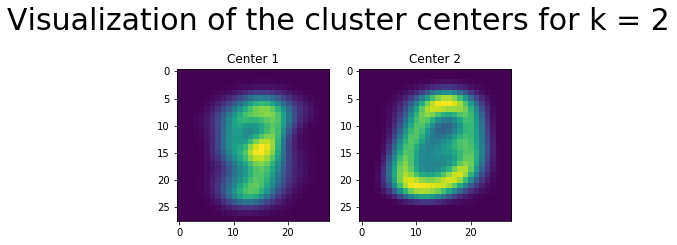

In [10]:
for i in range(0,2):
    plt.figure(2)
    plt.suptitle('Visualization of the cluster centers for k = 2', size = 30)
    a = 121 + i
    plt.subplot(a)
    plt.imshow(centers_2_reshape[i])
    b = str(i+1)
    plt.title('Center ' + b)

### k = 5

In [11]:
centers_5_reshape = centers_5.reshape(5, 28, 28)

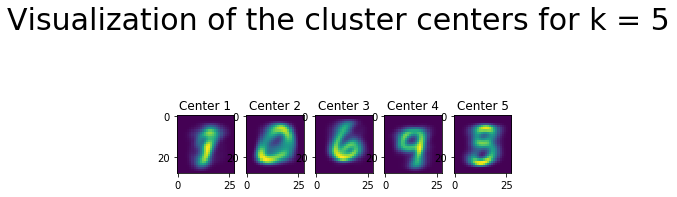

In [12]:
for i in range(0,5):
    plt.figure(5)
    plt.suptitle('Visualization of the cluster centers for k = 5', size = 30)
    a = 151 + i
    plt.subplot(a)
    plt.imshow(centers_5_reshape[i])
    b = str(i+1)
    plt.title('Center ' + b)

### k = 10

In [13]:
centers_10_reshape = centers_10.reshape(10, 28, 28)

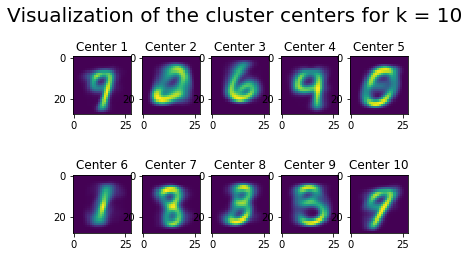

In [14]:
plt.suptitle('Visualization of the cluster centers for k = 10', size = 20)

k=0
for i in range(0,2):
    for j in range(0,5):
        plt.subplot2grid((2,5), (i,j))
        plt.imshow(centers_10_reshape[k])
        b = str(k+1)
        plt.title('Center ' + b)
        k += 1

### k = 30

In [15]:
centers_30_reshape = centers_30.reshape(30, 28, 28)

Text(0.5, 0.98, 'Visualization of the cluster centers for k = 30')

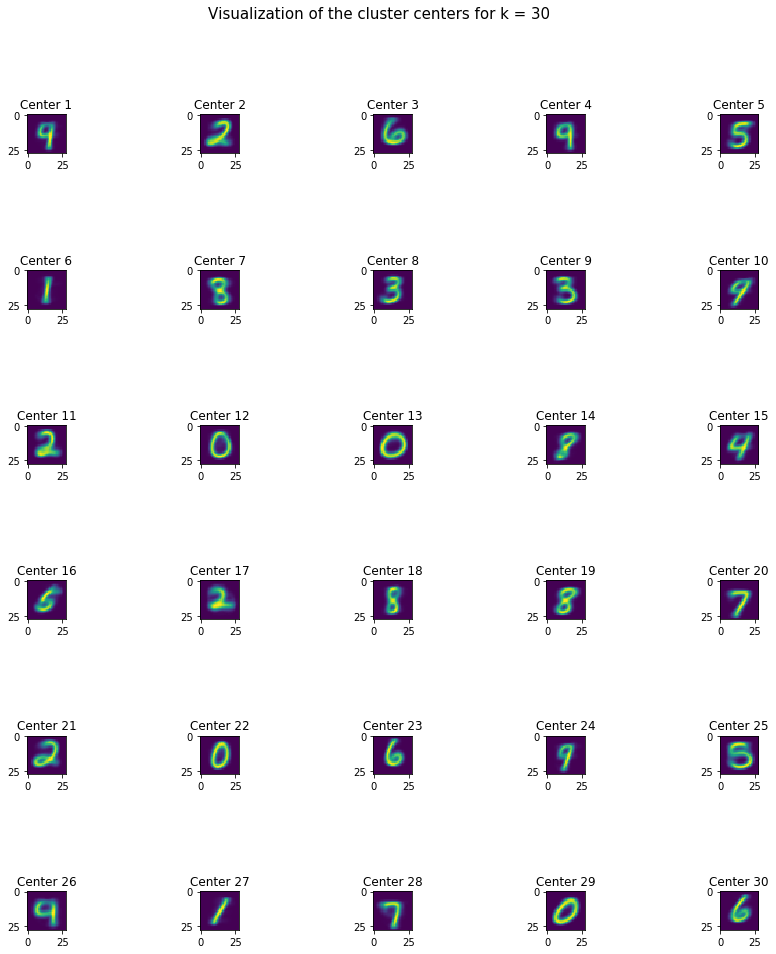

In [16]:
k=0
plt.figure(figsize=(15,15))
for i in range(0,6):
    for j in range(0,5):
        plt.subplot2grid((6,5), (i,j))
        plt.imshow(centers_30_reshape[k])
        plt.subplots_adjust(hspace = 3)
        b = str(k+1)
        plt.title('Center ' +b)
        k+=1

plt.suptitle('Visualization of the cluster centers for k = 30', size = 15)